In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

### Load the integration data

In [72]:
data = np.load('data/spinning_top.npz')
print('Available data files are {}'.format(data.files))

Available data files are ['q_list', 't_list', 'q_solutions', 'p_solutions']


In [73]:
q_list = data['q_list']
print('System coordinates are {}'.format(q_list))

System coordinates are ['psi' 'phi' 'theta']


In [74]:
t_list = data['t_list']
q_solutions = data['q_solutions']
p_solutions = data['p_solutions']

## Graph coordinate evolution

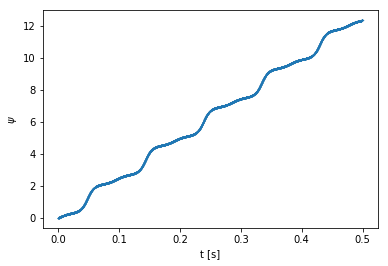

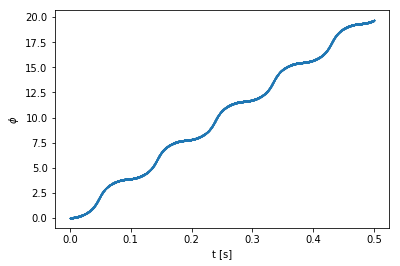

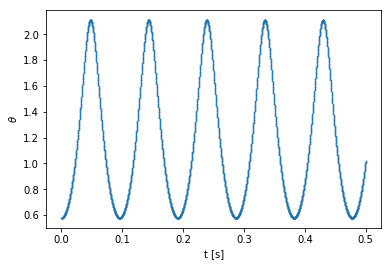

In [75]:
for i in range(0, len(q_list)):
#     plt.figure(dpi=500)
    plt.figure()
    plt.plot(t_list, [q_solutions[j].take(i) for j in range(0, len(q_solutions))], '.', MarkerSize=1)
    plt.xlabel('t [s]')
    plt.ylabel('$\\' + q_list[i] + '$')

## Graph on sphere

The radius of the spinning top is $R = 0.7\,m$.

In [76]:
R = 0.7

In [77]:
xs = []
ys = []
zs = []

In [78]:
for index, t in enumerate(t_list):
    psi, phi, theta = q_solutions[index]
    xs.append(
        R * np.sin(theta) * np.cos(phi)
    )
    ys.append(
        R * np.sin(theta) * np.sin(phi)
    )
    zs.append(
        R * np.cos(theta)
    )

In [108]:
# Data for sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones(np.size(u)), np.cos(v))

<IPython.core.display.Javascript object>


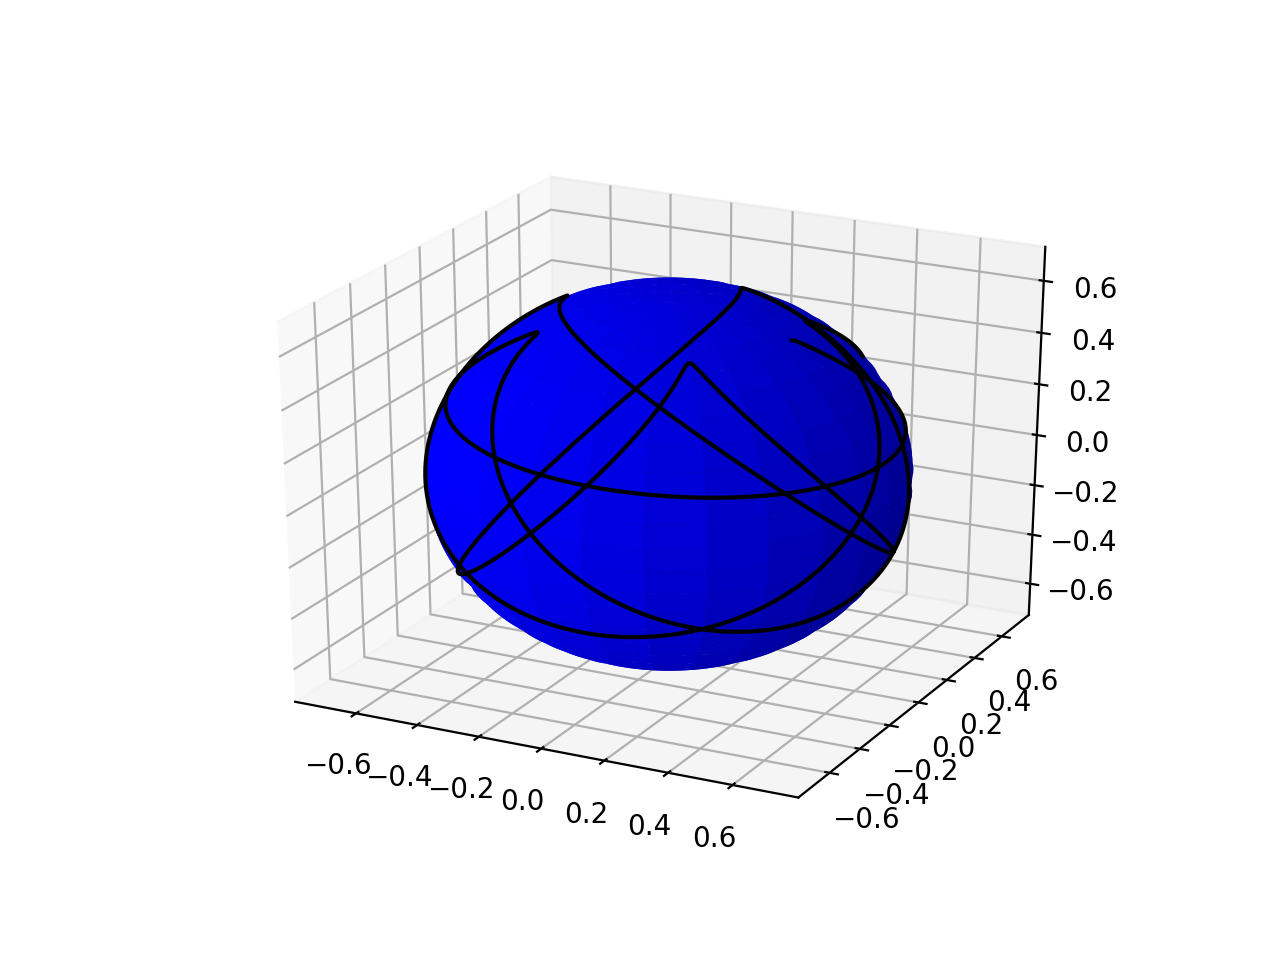

In [113]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, 'black', zorder=1)
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b', alpha=1, zorder=2)
plt.show()

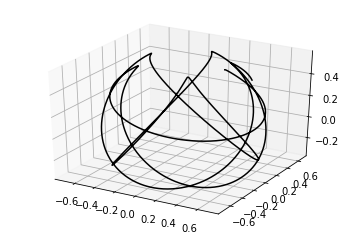

In [98]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, 'black')
plt.show()

## Write to file for use in Matlab

In [121]:
f = open("data/spinningtop.txt","w+")
f.write("t, psi, phi, theta\n")
for index, t in enumerate(t_list):
    f.write("{0}, {1}, {2}, {3}\n".format(t, *q_solutions[index].tolist()))
f.close()